In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from mylib import dispgraph
from mylib import prepare
from mylib import features

In [3]:
import importlib
importlib.reload(dispgraph)
importlib.reload(prepare)

<module 'mylib.prepare' from 'C:\\Users\\tomiyou\\GitHub\\datascience\\mylib\\prepare.py'>

In [4]:
import pickle
with open("./work/converted_train.pickle", 'rb') as f:
    train_data = pickle.load(f)
with open("./work/converted_test.pickle", 'rb') as f:
    test_data = pickle.load(f)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Master,...,Title_Rare,LastName,FamilySize,IsAlone,FamilySize_small,FamilySize_large,Embarked_C,Embarked_Q,Embarked_S,CabinIsNull
0,1,0,3,22.0,1,0,7.2500,0,1,0,...,0,Braund,2,0,1,0,0,0,1,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,...,0,Cumings,2,0,1,0,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,...,0,Heikkinen,1,1,1,0,0,0,1,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,...,0,Futrelle,2,0,1,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,0,...,0,Allen,1,1,1,0,0,0,1,1


In [6]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,...,Title_Rare,LastName,FamilySize,IsAlone,FamilySize_small,FamilySize_large,Embarked_C,Embarked_Q,Embarked_S,CabinIsNull
0,892,3,34.5,0,0,7.8292,0,1,0,0,...,0,Kelly,1,1,1,0,0,1,0,1
1,893,3,47.0,1,0,7.0000,1,0,0,0,...,0,Wilkes,2,0,1,0,0,0,1,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,...,0,Myles,1,1,1,0,0,1,0,1
3,895,3,27.0,0,0,8.6625,0,1,0,0,...,0,Wirz,1,1,1,0,0,0,1,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,...,0,Hirvonen,3,0,1,0,0,0,1,1


In [7]:
y_train = train_data["Survived"] 
X_train = train_data.drop(["Survived", "PassengerId", "LastName"], axis=1)
test_PassengerId = test_data["PassengerId"]
test_data = test_data.drop(["PassengerId", "LastName"], axis=1)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
PassengerId         891 non-null int64
Survived            891 non-null int64
Pclass              891 non-null int64
Age                 891 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Fare                891 non-null float64
Sex_female          891 non-null uint8
Sex_male            891 non-null uint8
Title_Master        891 non-null uint8
Title_Miss          891 non-null uint8
Title_Mr            891 non-null uint8
Title_Mrs           891 non-null uint8
Title_Rare          891 non-null uint8
LastName            891 non-null object
FamilySize          891 non-null int64
IsAlone             891 non-null int64
FamilySize_small    891 non-null int64
FamilySize_large    891 non-null int64
Embarked_C          891 non-null uint8
Embarked_Q          891 non-null uint8
Embarked_S          891 non-null uint8
CabinIsNull         891 non-null

### 特徴量のレンジを可視化
* 識別器によりレンジに敏感なので注意する

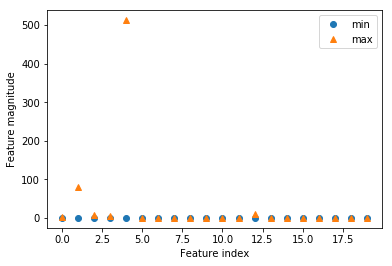

In [9]:
dispgraph.plot_feature_magnitude(X_train)

In [10]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import pipeline
from sklearn import metrics

In [11]:
# for XGBoostで発生するDeprecationWarning
import warnings
warnings.filterwarnings('ignore') 

In [12]:
# 提出用ファイル作成
def create_submit(predict_test, output_path):
    submit_data = pd.DataFrame({"PassengerId":test_PassengerId, "Survived":predict_test})
    submit_data.to_csv(output_path, index=None)

### まず全ての特徴量でロジスティック回帰

In [13]:
logisticRegressionModel = linear_model.LogisticRegressionCV().fit(X_train, y_train)
cv_split = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 )
cv_results = model_selection.cross_validate(logisticRegressionModel, X_train, y_train, return_train_score=True, cv  = cv_split)
print("score:{:.3f}".format(cv_results['test_score'].mean()))
pd.DataFrame({
        "name": list(X_train.columns),
        "coef": logisticRegressionModel.coef_[0]})

score:0.832


,coef,name
0,-0.798466,Pclass
1,-0.024420,Age
2,0.003997,SibSp
3,0.131991,Parch
4,0.003408,Fare
5,0.932364,Sex_female
6,-1.120181,Sex_male
7,2.209902,Title_Master
8,-0.379213,Title_Miss
9,-1.272435,Title_Mr


In [14]:
model = linear_model.LogisticRegressionCV()
pipe = pipeline.Pipeline([("preprocessing", preprocessing.StandardScaler()),
                          ("logisticRegressionModel", model)])

param_grid = {"preprocessing":[preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None]}

cv_split = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 )
grid = model_selection.GridSearchCV(pipe, param_grid=param_grid, cv=cv_split, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best cross-validation accuracy:{:.3f}".format(grid.best_score_))
print("Best parameters:{}".format(grid.best_params_))

logisticRegression_pipeline1 = grid.best_estimator_

pd.DataFrame({
        "name": list(X_train.columns),
        "coef": logisticRegression_pipeline1.named_steps["logisticRegressionModel"].coef_[0]})

Best cross-validation accuracy:0.833
Best parameters:{'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}


,coef,name
0,-0.486160,Pclass
1,-0.224235,Age
2,-0.098655,SibSp
3,0.011087,Parch
4,0.162925,Fare
5,0.364777,Sex_female
6,-0.364777,Sex_male
7,0.414973,Title_Master
8,0.127944,Title_Miss
9,-0.438720,Title_Mr


In [15]:
logisticRegression_pipeline1

Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticRegressionModel', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [16]:
create_submit(logisticRegression_pipeline1.predict(test_data), "logisticRegression_submit1.csv") # 0.77990

### ランダムフォレストで特徴を厳選

In [17]:
rfe = feature_selection.RFE(ensemble.RandomForestClassifier(n_estimators=100, max_depth=5))
rfe.fit(X_train, y_train)
selected_rfe_columns = X_train.columns[rfe.get_support()].values
selected_rfe_columns

array(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Title_Mr',
       'FamilySize', 'FamilySize_small', 'FamilySize_large',
       'CabinIsNull'], dtype=object)

In [18]:
X_train_selected_rfe = rfe.transform(X_train)
test_data_selected_rfe = rfe.transform(test_data)

In [19]:
randomForest = ensemble.RandomForestClassifier(n_estimators=100, max_depth=5).fit(X_train_selected_rfe, y_train)
cv_split = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 )
cv_results = model_selection.cross_validate(randomForest, X_train_selected_rfe, y_train, return_train_score=True, cv  = cv_split)
print("score:{:.3f}".format(cv_results['test_score'].mean()))
feature_importances = pd.DataFrame({"feature":selected_rfe_columns, "importances":randomForest.feature_importances_})
feature_importances.sort_values("importances", ascending=False)

score:0.832


,feature,importances
5,Title_Mr,0.223069
3,Sex_female,0.173139
4,Sex_male,0.170527
2,Fare,0.099872
0,Pclass,0.094642
1,Age,0.070112
6,FamilySize,0.057767
9,CabinIsNull,0.052434
8,FamilySize_large,0.032187
7,FamilySize_small,0.026251


In [20]:
create_submit(randomForest.predict(test_data_selected_rfe), "randomForest_submit1.csv") # 0.78947

### ランダムフォレストのパラメータをチューニング

In [21]:
randomForest = ensemble.RandomForestClassifier(n_estimators=100)
param_grid = { 
#    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    "max_depth": [2, 4, 6, 8, 10, None],
    'min_samples_split': np.arange(8,12)
#    'max_leaf_nodes':[2, 5, 10, None],
#    'min_samples_leaf':[1, 2, 5, 10],
}

cv_split = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 )
grid = model_selection.GridSearchCV(randomForest, param_grid=param_grid, cv=cv_split, n_jobs=-1)
grid.fit(X_train_selected_rfe, y_train)

print("Best cross-validation accuracy:{:.3f}".format(grid.best_score_))
print("Best parameters:{}".format(grid.best_params_))

randomForest_grid = grid

Best cross-validation accuracy:0.840
Best parameters:{'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 8}


In [22]:
randomForest_best = randomForest_grid.best_estimator_
create_submit(randomForest_best.predict(test_data_selected_rfe), "randomForest_submit2.csv") # 0.77990

trainデータによりフィットさせると、testデータではスコアがむしろ下がる

### SVM

In [23]:
pipe = pipeline.Pipeline([("preprocessing", preprocessing.StandardScaler()),
                          ("svm", svm.SVC())])

param_grid = {"preprocessing":[preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None],
              "svm__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "svm__gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

cv_split = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 )
grid = model_selection.GridSearchCV(pipe,
                                    param_grid=param_grid,
                                    return_train_score=True,
                                    cv=cv_split,
                                    n_jobs=-1)
grid.fit(X_train_selected_rfe, y_train)

print("Best cross-validation accuracy:{:.3f}".format(grid.best_score_))
print("Best parameters:{}".format(grid.best_params_))

svm_pipeline = grid.best_estimator_

Best cross-validation accuracy:0.837
Best parameters:{'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True), 'svm__C': 100, 'svm__gamma': 0.01}


In [24]:
create_submit(svm_pipeline.predict(test_data_selected_rfe), "svm_submit1.csv") # 0.78947

###  アンサンブルを試す

In [25]:
names = [
    "LogisticRegression",
    "KNeighbors",
    "AdaBoost",
    "GradientBoosting",
    "RandomForest",
    "SVM",
    "XGBoost"
]

classifiers = [
    pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.LogisticRegression()),
    neighbors.KNeighborsClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators=100, max_depth=5),
    pipeline.make_pipeline(preprocessing.StandardScaler(), svm.SVC()),
    XGBClassifier()
]

results = pd.DataFrame(index=names, columns=["score"])
estimators = list(zip(names, classifiers))
cv_split = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 )
for name, classfier in estimators:
    print(name, classfier)
    cv_results = model_selection.cross_validate(classfier, X_train_selected_rfe, y_train, return_train_score=True, cv  = cv_split)
    results.loc[name, 'score'] = cv_results['test_score'].mean()

results

LogisticRegression Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
KNeighbors KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
AdaBoost AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
GradientBoosting GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
    

,score
LogisticRegression,0.826119
KNeighbors,0.726866
AdaBoost,0.799254
GradientBoosting,0.825373
RandomForest,0.837313
SVM,0.833582
XGBoost,0.823134


In [26]:
vc = ensemble.VotingClassifier(estimators, voting="hard")
vc.fit(X_train_selected_rfe, y_train)
vc.score(X_train_selected_rfe, y_train)

0.8507295173961841

In [27]:
create_submit(vc.predict(test_data_selected_rfe), "votingClassifier.csv") # 0.7894

trainデータにフィットさせてもスコアが伸びないため、オーバーフィットしてる？  
特徴量の選択を見直してみる。

### 特徴量の選択やり直し

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
Pclass              891 non-null int64
Age                 891 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Fare                891 non-null float64
Sex_female          891 non-null uint8
Sex_male            891 non-null uint8
Title_Master        891 non-null uint8
Title_Miss          891 non-null uint8
Title_Mr            891 non-null uint8
Title_Mrs           891 non-null uint8
Title_Rare          891 non-null uint8
FamilySize          891 non-null int64
IsAlone             891 non-null int64
FamilySize_small    891 non-null int64
FamilySize_large    891 non-null int64
Embarked_C          891 non-null uint8
Embarked_Q          891 non-null uint8
Embarked_S          891 non-null uint8
CabinIsNull         891 non-null int64
dtypes: float64(2), int64(8), uint8(10)
memory usage: 78.4 KB


In [29]:
select = [
    "Sex_female",
    "Sex_male",
    "FamilySize",
    "Pclass"
]
X_train_selected = X_train[select]
X_train_selected.head()

,Sex_female,Sex_male,FamilySize,Pclass
0,0,1,2,3
1,1,0,2,1
2,1,0,1,3
3,1,0,2,1
4,0,1,1,3


In [30]:
test_data_selected = test_data[select]
test_data_selected.head()

,Sex_female,Sex_male,FamilySize,Pclass
0,0,1,1,3
1,1,0,2,3
2,0,1,1,2
3,0,1,1,3
4,1,0,3,3


XGBoostで予測ながら検査する

In [31]:
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [32]:
def validate(xgb, data):
    cv_split = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 )
    cv_results = model_selection.cross_validate(xgb, data, y_train, return_train_score=True, cv  = cv_split)
    print("score:{:.3f}".format(cv_results['test_score'].mean()))

In [33]:
validate(xgb, X_train_selected)

score:0.793


In [34]:
xgb.fit(X_train_selected, y_train)
create_submit(xgb.predict(test_data_selected), "xgb1.csv") #  0.77511

In [35]:
select = [
    "Sex_female",
    "Sex_male",
    "FamilySize",
    "Pclass",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S"
]
X_train_selected = X_train[select]
test_data_selected = test_data[select]
test_data_selected.head()

,Sex_female,Sex_male,FamilySize,Pclass,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,3,0,1,0
1,1,0,2,3,0,0,1
2,0,1,1,2,0,1,0
3,0,1,1,3,0,0,1
4,1,0,3,3,0,0,1


In [36]:
validate(xgb, X_train_selected)
xgb.fit(X_train_selected, y_train)
create_submit(xgb.predict(test_data_selected), "xgb2.csv") #  0.77990

score:0.801


In [37]:
select = [
    "Sex_female",
    "Sex_male",
    "FamilySize",
    "Pclass",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S",
    "Fare"
]
X_train_selected = X_train[select]
test_data_selected = test_data[select]
test_data_selected.head()

,Sex_female,Sex_male,FamilySize,Pclass,Embarked_C,Embarked_Q,Embarked_S,Fare
0,0,1,1,3,0,1,0,7.8292
1,1,0,2,3,0,0,1,7.0000
2,0,1,1,2,0,1,0,9.6875
3,0,1,1,3,0,0,1,8.6625
4,1,0,3,3,0,0,1,12.2875


In [38]:
validate(xgb, X_train_selected)
xgb.fit(X_train_selected, y_train)
create_submit(xgb.predict(test_data_selected), "xgb3.csv") # 0.79425

score:0.801


In [39]:
select = [
    "Sex_female",
    "Sex_male",
    "FamilySize",
    "Pclass",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S",
    "Fare",
    "Title_Master"
]
X_train_selected = X_train[select]
test_data_selected = test_data[select]
test_data_selected.head()

,Sex_female,Sex_male,FamilySize,Pclass,Embarked_C,Embarked_Q,Embarked_S,Fare,Title_Master
0,0,1,1,3,0,1,0,7.8292,0
1,1,0,2,3,0,0,1,7.0000,0
2,0,1,1,2,0,1,0,9.6875,0
3,0,1,1,3,0,0,1,8.6625,0
4,1,0,3,3,0,0,1,12.2875,0


In [40]:
validate(xgb, X_train_selected)
xgb.fit(X_train_selected, y_train)
create_submit(xgb.predict(test_data_selected), "xgb4.csv") # 0.80861

score:0.828
